<a href="https://colab.research.google.com/github/kapilkn/ML/blob/master/COVID19_Forecasting_by_Kapil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## COVID 19 Prediction India 
**Kapil Nagwanshi**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px # Word map
import pandas.util.testing as tm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
path = 'https://raw.githubusercontent.com/umangkejriwal1122/Machine-Learning/master/Data%20Sets/covid_19_clean_complete.csv'
df = pd.read_csv(path)
df.head().style.background_gradient(cmap='Reds')

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,nan,Afghanistan,33.000000,65.000000,1/22/20,0,0,0
1,nan,Albania,41.153300,20.168300,1/22/20,0,0,0
2,nan,Algeria,28.033900,1.659600,1/22/20,0,0,0
3,nan,Andorra,42.506300,1.521800,1/22/20,0,0,0
4,nan,Angola,-11.202700,17.873900,1/22/20,0,0,0


In [3]:
df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
25671,Saint Pierre and Miquelon,France,46.885200,-56.315900,4/28/20,1,0,0
25672,NaN,South Sudan,6.877000,31.307000,4/28/20,34,0,0
25673,NaN,Western Sahara,24.215500,-12.885800,4/28/20,6,0,5
25674,NaN,Sao Tome and Principe,0.186360,6.613081,4/28/20,8,0,4
25675,NaN,Yemen,15.552727,48.516388,4/28/20,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25676 entries, 0 to 25675
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  7840 non-null   object 
 1   Country/Region  25676 non-null  object 
 2   Lat             25676 non-null  float64
 3   Long            25676 non-null  float64
 4   Date            25676 non-null  object 
 5   Confirmed       25676 non-null  int64  
 6   Deaths          25676 non-null  int64  
 7   Recovered       25676 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 1.6+ MB


In [5]:
# We need to convert date into date time format
#state is not required for analysis her
df = pd.read_csv(path,parse_dates=['Date'])
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0


## **Time Series Data**

In [0]:
df.drop(['Province/State'],axis=1,inplace=True)

In [7]:
df.rename(columns={"Country/Region" : "Country"},inplace=True)
df.head()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,Angola,-11.2027,17.8739,2020-01-22,0,0,0


In [0]:
active = df['Confirmed']-df['Deaths']-df['Recovered']
df['Active'] =active

In [9]:
df.head()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0,0
1,Albania,41.1533,20.1683,2020-01-22,0,0,0,0
2,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0
3,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0
4,Angola,-11.2027,17.8739,2020-01-22,0,0,0,0


In [0]:
top = df[df['Date']== df['Date'].max()]

In [11]:
df.rename(columns={"Actve" : "Active"},inplace=True)
df.head()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0,0
1,Albania,41.1533,20.1683,2020-01-22,0,0,0,0
2,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0
3,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0
4,Angola,-11.2027,17.8739,2020-01-22,0,0,0,0


Top Countries

In [12]:
df['Date'].max()

Timestamp('2020-04-28 00:00:00')

In [13]:
top.head()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
25414,Afghanistan,33.0000,65.0000,2020-04-28,1828,58,228,1542
25415,Albania,41.1533,20.1683,2020-04-28,750,30,431,289
25416,Algeria,28.0339,1.6596,2020-04-28,3649,437,1651,1561
25417,Andorra,42.5063,1.5218,2020-04-28,743,41,398,304
25418,Angola,-11.2027,17.8739,2020-04-28,27,2,6,19


In [14]:
world =top.groupby('Country')['Confirmed',	'Deaths',	'Recovered'	,'Active'].sum().reset_index()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [15]:
world.head()

,Country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,1828,58,228,1542
1,Albania,750,30,431,289
2,Algeria,3649,437,1651,1561
3,Andorra,743,41,398,304
4,Angola,27,2,6,19


### Plotting on world map-Active Cases

In [16]:
#### Plotting On World Map (Active Cases)
figure = px.choropleth(world,locations='Country',locationmode='country names',color='Active',
                       hover_name='Country',range_color=[1,10000],color_continuous_scale='picnic',
                       title='Countries With Active Cases')
figure.show()

## Wordwide active cases over time

In [17]:
total_active_cases = df.groupby('Date')['Date','Active'].sum().reset_index()
total_active_cases.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,Active
93,2020-04-24,1845519
94,2020-04-25,1898620
95,2020-04-26,1922873
96,2020-04-27,1961174
97,2020-04-28,1996339


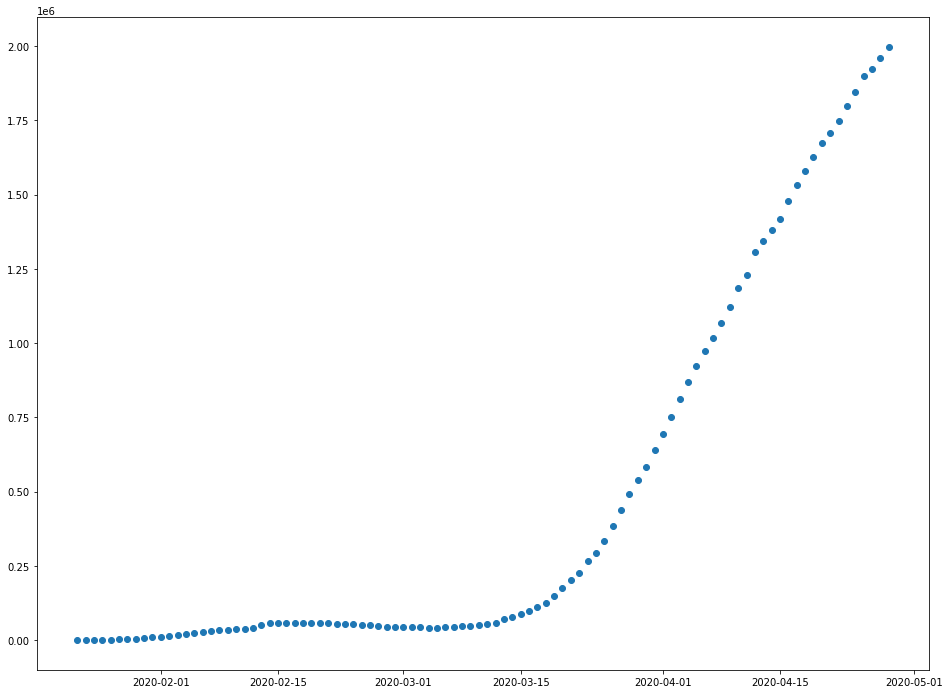

In [18]:
plt.figure(figsize=(16,12))
plt.scatter(total_active_cases.Date,total_active_cases.Active)
plt.show()

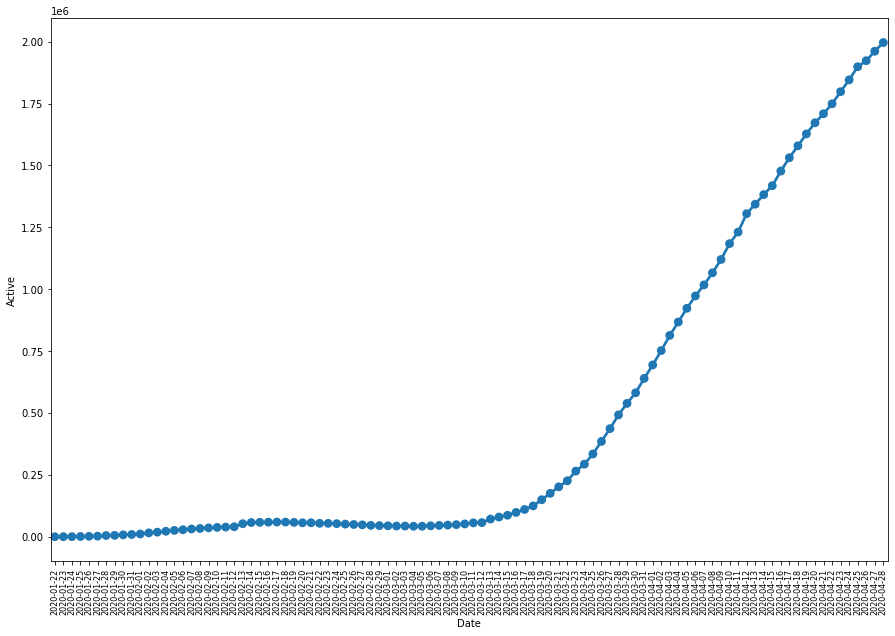

In [19]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90,fontsize=8)
sns.pointplot(total_active_cases['Date'].dt.date,total_active_cases['Active'])
plt.show()

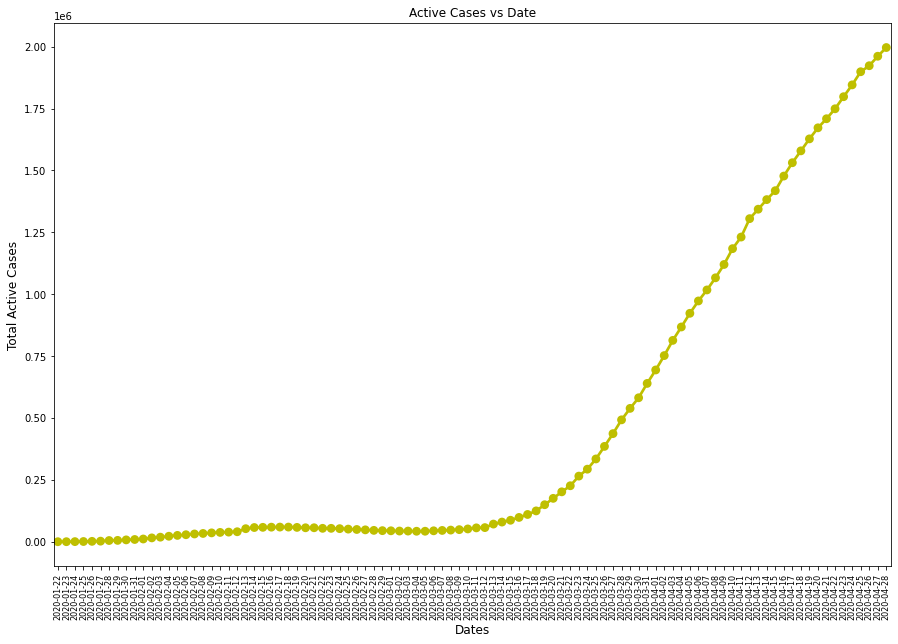

In [20]:
plt.figure(figsize=(15,10))
plt.title("Active Cases vs Date")
plt.xticks(rotation=90,fontsize=8)
sns.pointplot(total_active_cases['Date'].dt.date,total_active_cases['Active'],color='y')
plt.xlabel("Dates",fontsize=12)
plt.ylabel("Total Active Cases",fontsize=12)
plt.show()

### Top 20 countries having confirmed cases

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



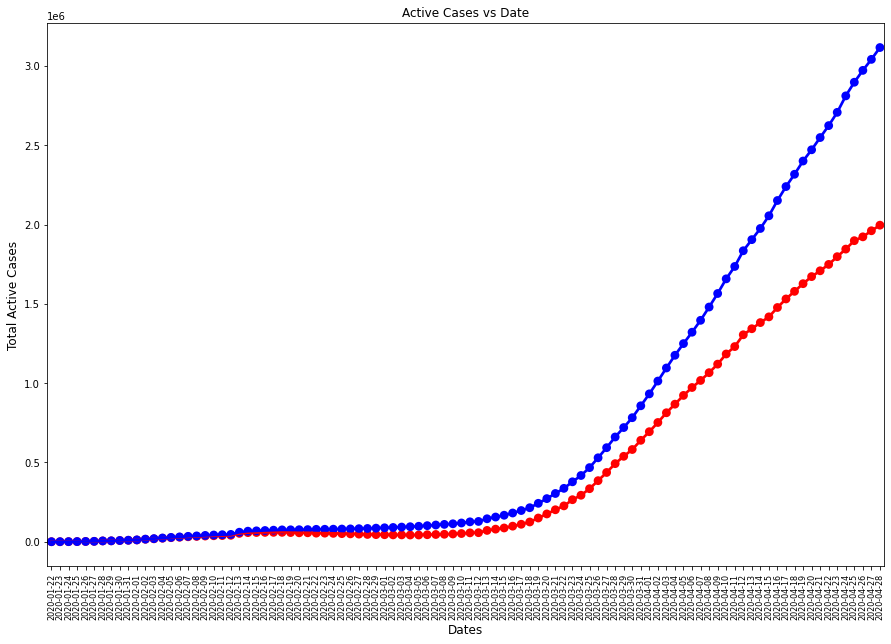

In [21]:
total_confirmed_cases = df.groupby('Date')['Date','Confirmed'].sum().reset_index()
plt.figure(figsize=(15,10))
plt.title("Active Cases vs Date")
plt.xticks(rotation=90,fontsize=8)
sns.pointplot(total_active_cases['Date'].dt.date,total_active_cases['Active'],color='red')
sns.pointplot(total_confirmed_cases['Date'].dt.date,total_confirmed_cases['Confirmed'],color='blue')
plt.xlabel("Dates",fontsize=12)
plt.ylabel("Total Active Cases",fontsize=12)
plt.show()

In [22]:
#### Top 20 Countries Having Confirmed Cases
top.head()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
25414,Afghanistan,33.0000,65.0000,2020-04-28,1828,58,228,1542
25415,Albania,41.1533,20.1683,2020-04-28,750,30,431,289
25416,Algeria,28.0339,1.6596,2020-04-28,3649,437,1651,1561
25417,Andorra,42.5063,1.5218,2020-04-28,743,41,398,304
25418,Angola,-11.2027,17.8739,2020-04-28,27,2,6,19


In [23]:
top_confirmed = top.groupby('Country')['Confirmed'].sum().sort_values(ascending=False).reset_index()
top_confirmed.head()  ### gropu the data by country and sort acc. to confirmed

,Country,Confirmed
0,US,1012582
1,Spain,232128
2,Italy,201505
3,France,169053
4,United Kingdom,162350


In [24]:
top_20 = top_confirmed.head(20)
top_20

,Country,Confirmed
0,US,1012582
1,Spain,232128
2,Italy,201505
3,France,169053
4,United Kingdom,162350
5,Germany,159912
6,Turkey,114653
7,Russia,93558
8,Iran,92584
9,China,83940


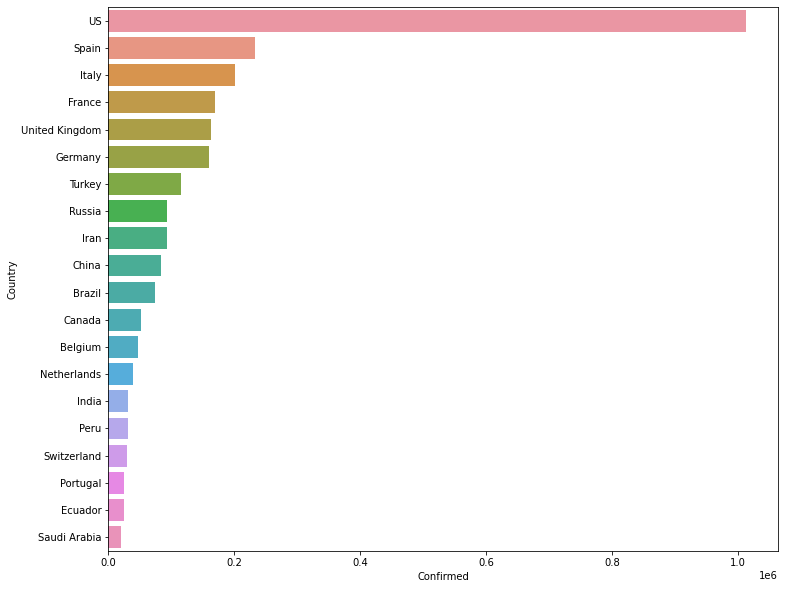

In [25]:
plt.figure(figsize=(12,10))
sns.barplot(top_20['Confirmed'],top_20['Country'])
plt.show()

In [0]:
### making dataframes for different countries

In [27]:
china = df[df['Country']=='China']
china = china.groupby('Date')['Recovered','Active','Confirmed','Deaths'].sum().reset_index()
china.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,Recovered,Active,Confirmed,Deaths
0,2020-01-22,28,503,548,17
1,2020-01-23,30,595,643,18
2,2020-01-24,35,859,920,26
3,2020-01-25,38,1326,1406,42
4,2020-01-26,48,1971,2075,56


In [28]:
india = df[df['Country']=='India']
india = india.groupby('Date')['Recovered','Active','Confirmed','Deaths'].sum().reset_index()
india.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,Recovered,Active,Confirmed,Deaths
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0


In [29]:
italy = df[df['Country']=='Italy']
italy = italy.groupby('Date')['Recovered','Active','Confirmed','Deaths'].sum().reset_index()
italy.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,Recovered,Active,Confirmed,Deaths
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0


In [30]:
us = df[df['Country']=='US']
us = us.groupby('Date')['Recovered','Active','Confirmed','Deaths'].sum().reset_index()
us.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,Recovered,Active,Confirmed,Deaths
0,2020-01-22,0,1,1,0
1,2020-01-23,0,1,1,0
2,2020-01-24,0,2,2,0
3,2020-01-25,0,2,2,0
4,2020-01-26,0,5,5,0


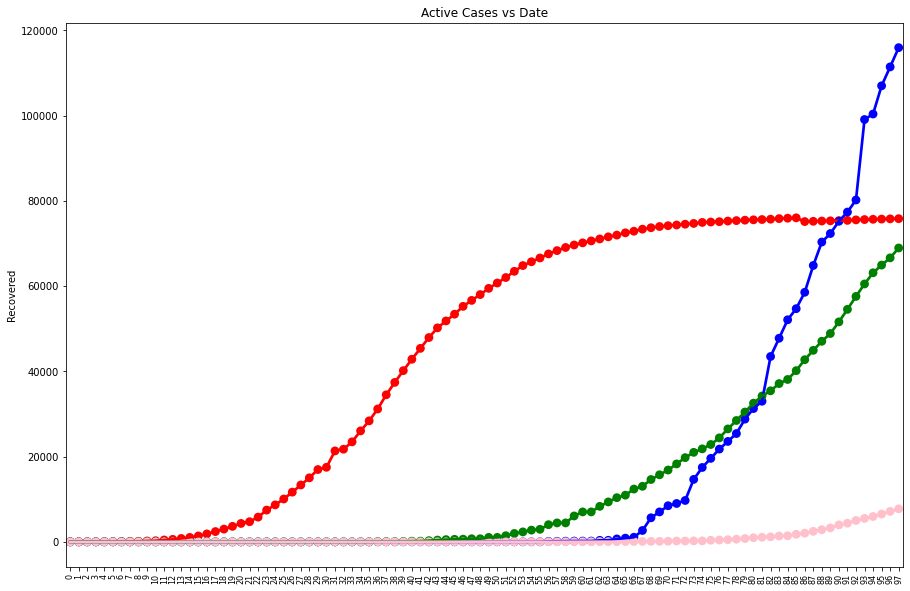

In [31]:
plt.figure(figsize=(15,10))
plt.title("Active Cases vs Date")
plt.xticks(rotation=90,fontsize=8)
sns.pointplot(china.index,china['Recovered'],color='red')
sns.pointplot(us.index,us['Recovered'],color='blue')
sns.pointplot(italy.index,italy['Recovered'],color='green')
sns.pointplot(india.index,india['Recovered'],color='pink')

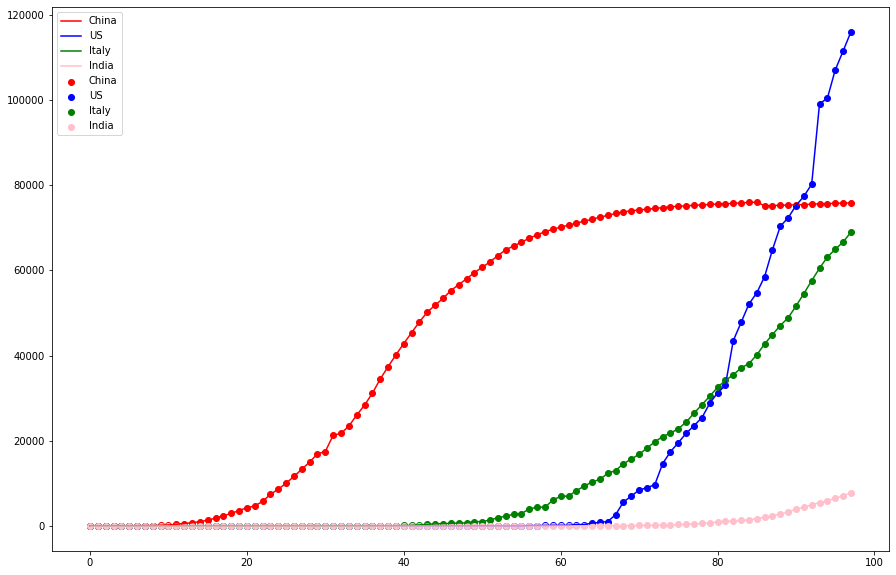

In [32]:
plt.figure(figsize=(15,10))
plt.plot(china.index,china['Recovered'],color='red',label="China")
plt.plot(us.index,us['Recovered'],color='blue',label='US')
plt.plot(italy.index,italy['Recovered'],color='green',label='Italy')
plt.plot(india.index,india['Recovered'],color='pink',label='India')
plt.scatter(china.index,china['Recovered'],color='red',label="China")
plt.scatter(us.index,us['Recovered'],color='blue',label='US')
plt.scatter(italy.index,italy['Recovered'],color='green',label='Italy')
plt.scatter(india.index,india['Recovered'],color='pink',label='India')
plt.legend(loc=2)
plt.show()

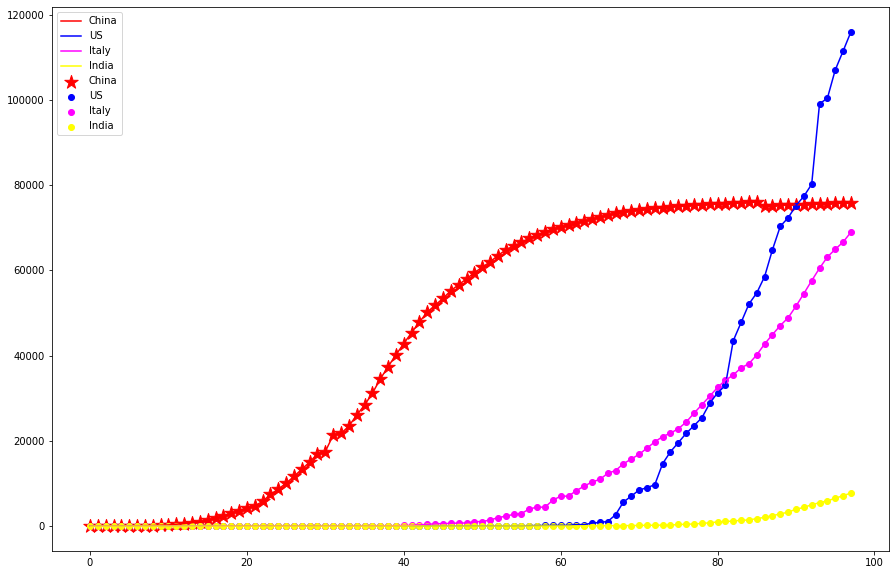

In [33]:
plt.figure(figsize=(15,10))
plt.plot(china.index,china['Recovered'],color='red',label="China")
plt.plot(us.index,us['Recovered'],color='blue',label='US')
plt.plot(italy.index,italy['Recovered'],color='magenta',label='Italy')
plt.plot(india.index,india['Recovered'],color='yellow',label='India')
plt.scatter(china.index,china['Recovered'],color='red',label="China", marker='*',s=200)
plt.scatter(us.index,us['Recovered'],color='blue',label='US')
plt.scatter(italy.index,italy['Recovered'],color='magenta',label='Italy')
plt.scatter(india.index,india['Recovered'],color='yellow',label='India')
plt.legend(loc=2)# Left Top
plt.show()

In [34]:
df.head().style.background_gradient(cmap='Reds')

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,Afghanistan,33.000000,65.000000,2020-01-22 00:00:00,0,0,0,0
1,Albania,41.153300,20.168300,2020-01-22 00:00:00,0,0,0,0
2,Algeria,28.033900,1.659600,2020-01-22 00:00:00,0,0,0,0
3,Andorra,42.506300,1.521800,2020-01-22 00:00:00,0,0,0,0
4,Angola,-11.202700,17.873900,2020-01-22 00:00:00,0,0,0,0


In [0]:
active = df.groupby('Date')['Active'].sum().reset_index()
confirmed = df.groupby('Date')['Confirmed'].sum().reset_index()

In [36]:
active.head().style.background_gradient(cmap='Reds')

,Date,Active
0,2020-01-22 00:00:00,510
1,2020-01-23 00:00:00,606
2,2020-01-24 00:00:00,880
3,2020-01-25 00:00:00,1354
4,2020-01-26 00:00:00,2011


In [0]:
from fbprophet import Prophet
## A library in python created by fb for the time series forecasting
## we need two columns first -date(ds), second-forecast_value(y) (Restircted name ds and y)
## So rename is required

In [38]:
active.rename(columns={'Date':'ds','Active':'y'},inplace=True)
active.head().style.background_gradient(cmap='Reds')

,ds,y
0,2020-01-22 00:00:00,510
1,2020-01-23 00:00:00,606
2,2020-01-24 00:00:00,880
3,2020-01-25 00:00:00,1354
4,2020-01-26 00:00:00,2011


### Building the model

In [0]:
model = Prophet(interval_width=0.95) ## Confidence Level

In [40]:
model.fit(active)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [41]:
future = model.make_future_dataframe(periods=7)
future.tail()

,ds
100,2020-05-01
101,2020-05-02
102,2020-05-03
103,2020-05-04
104,2020-05-05


In [0]:
forecast = model.predict(future)

In [43]:
forecast.tail(7).style.background_gradient(cmap='Reds')

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
98,2020-04-29 00:00:00,2078048.387280,2060020.202192,2088947.654937,2075682.192233,2079778.208782,-3668.791035,-3668.791035,-3668.791035,-3668.791035,-3668.791035,-3668.791035,0.000000,0.000000,0.000000,2074379.596245
99,2020-04-30 00:00:00,2125045.164666,2106679.135328,2140204.526474,2117417.709140,2131761.122919,-1251.372734,-1251.372734,-1251.372734,-1251.372734,-1251.372734,-1251.372734,0.000000,0.000000,0.000000,2123793.791932
100,2020-05-01 00:00:00,2172041.942052,2154752.776377,2192192.124191,2156978.465146,2184596.777908,2407.543169,2407.543169,2407.543169,2407.543169,2407.543169,2407.543169,0.000000,0.000000,0.000000,2174449.485222
101,2020-05-02 00:00:00,2219038.719439,2195821.029700,2246083.765534,2196914.612856,2238104.103002,3343.856333,3343.856333,3343.856333,3343.856333,3343.856333,3343.856333,0.000000,0.000000,0.000000,2222382.575771
102,2020-05-03 00:00:00,2266035.496825,2237476.646992,2298488.817073,2236567.425696,2292408.269457,2485.956730,2485.956730,2485.956730,2485.956730,2485.956730,2485.956730,0.000000,0.000000,0.000000,2268521.453554
103,2020-05-04 00:00:00,2313032.274211,2268404.256461,2354989.967537,2273660.192188,2349014.494670,47.545886,47.545886,47.545886,47.545886,47.545886,47.545886,0.000000,0.000000,0.000000,2313079.820097
104,2020-05-05 00:00:00,2360029.051597,2306000.695622,2406199.054712,2312391.977237,2406485.308362,-3364.738349,-3364.738349,-3364.738349,-3364.738349,-3364.738349,-3364.738349,0.000000,0.000000,0.000000,2356664.313248


In [44]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(7).style.background_gradient(cmap='Reds')

,ds,yhat,yhat_lower,yhat_upper
98,2020-04-29 00:00:00,2074379.596245,2060020.202192,2088947.654937
99,2020-04-30 00:00:00,2123793.791932,2106679.135328,2140204.526474
100,2020-05-01 00:00:00,2174449.485222,2154752.776377,2192192.124191
101,2020-05-02 00:00:00,2222382.575771,2195821.029700,2246083.765534
102,2020-05-03 00:00:00,2268521.453554,2237476.646992,2298488.817073
103,2020-05-04 00:00:00,2313079.820097,2268404.256461,2354989.967537
104,2020-05-05 00:00:00,2356664.313248,2306000.695622,2406199.054712


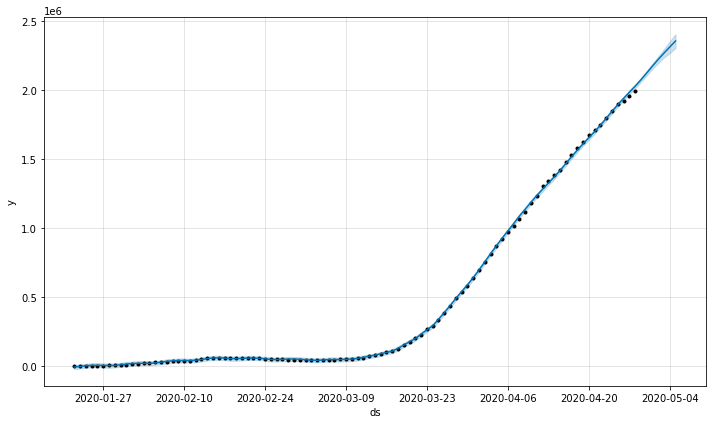

In [45]:
active_plot = model.plot(forecast)

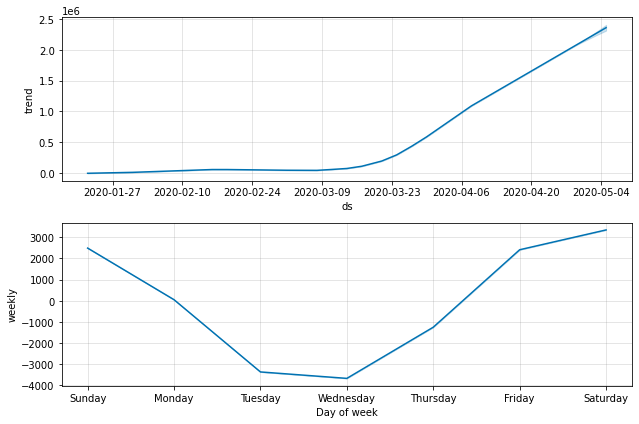

In [46]:
active_plot_weekly = model.plot_components(forecast)

In [47]:
confirmed.head().style.background_gradient(cmap='Reds')
confirmed.rename(columns={'Date':'ds','Confirmed':'y'},inplace=True)
confirmed.head().style.background_gradient(cmap='Reds')


,ds,y
0,2020-01-22 00:00:00,555
1,2020-01-23 00:00:00,654
2,2020-01-24 00:00:00,941
3,2020-01-25 00:00:00,1434
4,2020-01-26 00:00:00,2118


In [48]:
model = Prophet(interval_width=0.95) ## Confidence Level
model.fit(confirmed)
forecast = model.predict(future)
future = model.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
100,2020-05-01
101,2020-05-02
102,2020-05-03
103,2020-05-04
104,2020-05-05


In [49]:
forecast.tail(7).style.background_gradient(cmap='Reds')
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(7).style.background_gradient(cmap='Reds')

,ds,yhat,yhat_lower,yhat_upper
98,2020-04-29 00:00:00,3206534.377143,3197594.136256,3215264.705993
99,2020-04-30 00:00:00,3291163.256969,3279763.579116,3301877.617013
100,2020-05-01 00:00:00,3378129.187107,3360153.533932,3396500.547722
101,2020-05-02 00:00:00,3460907.994149,3434747.781426,3486624.258892
102,2020-05-03 00:00:00,3542039.184135,3507692.632180,3580854.129045
103,2020-05-04 00:00:00,3619916.569979,3573814.764173,3669070.523558
104,2020-05-05 00:00:00,3699227.071765,3643142.844817,3760044.479913


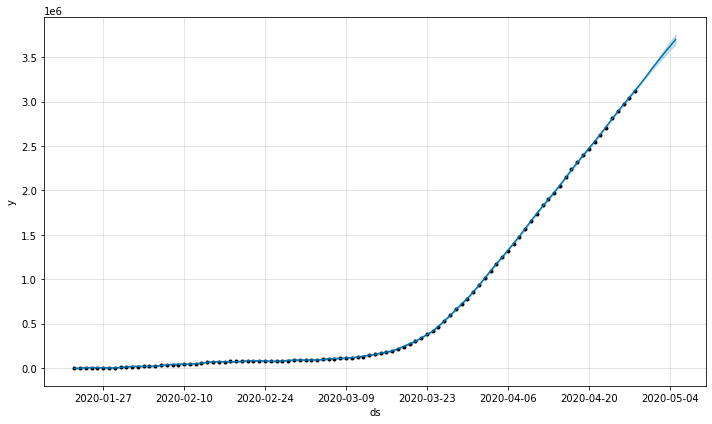

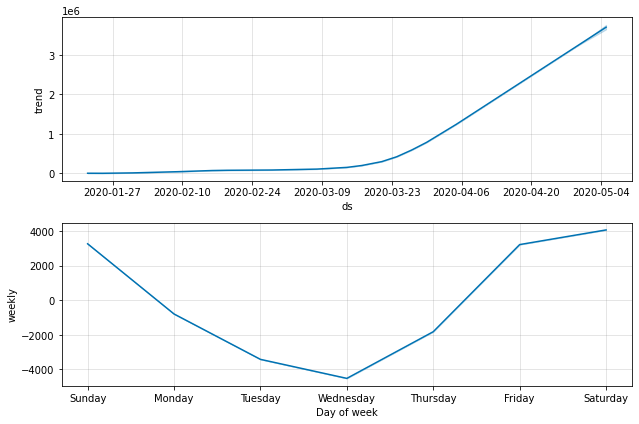

In [50]:
confirmed_plot = model.plot(forecast)
confirmed_plot_weekly = model.plot_components(forecast)

In [51]:
df_india = df[df['Country']=='India']
df_india.head()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
131,India,21.0,78.0,2020-01-22,0,0,0,0
393,India,21.0,78.0,2020-01-23,0,0,0,0
655,India,21.0,78.0,2020-01-24,0,0,0,0
917,India,21.0,78.0,2020-01-25,0,0,0,0
1179,India,21.0,78.0,2020-01-26,0,0,0,0


In [0]:
active  = df_india.groupby('Date')['Active'].sum().reset_index()
confirmed  = df_india.groupby('Date')['Confirmed'].sum().reset_index()

In [53]:
confirmed.rename(columns={'Date':"ds","Confirmed":"y"},inplace=True)
confirmed.head()

,ds,y
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


In [54]:
#### Building the Model
model = Prophet(interval_width=0.95)  ## Confidence Level
model.fit(confirmed)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [55]:
future = model.make_future_dataframe(periods = 7)
future.tail(10)

,ds
95,2020-04-26
96,2020-04-27
97,2020-04-28
98,2020-04-29
99,2020-04-30
100,2020-05-01
101,2020-05-02
102,2020-05-03
103,2020-05-04
104,2020-05-05


In [0]:
forecast = model.predict(future)

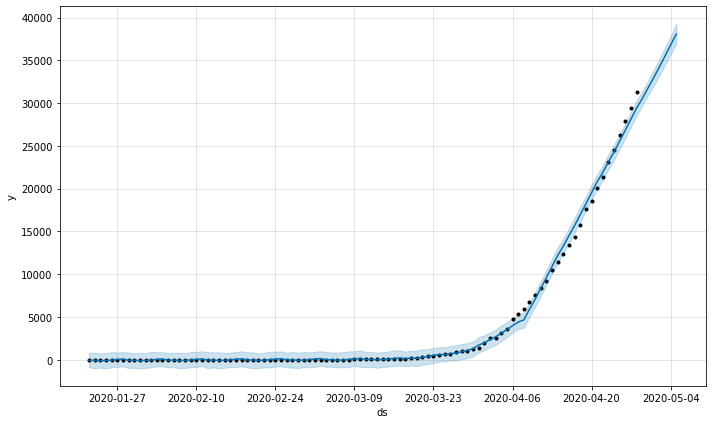

In [57]:
india_plot = model.plot(forecast)

In [58]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(7).style.background_gradient(cmap='Reds')
#yhat - predicted/forecasted value
#yhat_lower = lower value of prediction
#yhat_upper = upper value of prediction 

,ds,yhat,yhat_lower,yhat_upper
98,2020-04-29 00:00:00,30540.327384,29691.785725,31420.358799
99,2020-04-30 00:00:00,31773.467735,30901.863151,32621.376249
100,2020-05-01 00:00:00,32949.515342,32003.089253,33851.991585
101,2020-05-02 00:00:00,34211.478572,33194.015088,35168.952854
102,2020-05-03 00:00:00,35486.990041,34462.483566,36510.331061
103,2020-05-04 00:00:00,36789.403988,35688.405040,37833.502760
104,2020-05-05 00:00:00,38068.264262,36945.449761,39282.820654


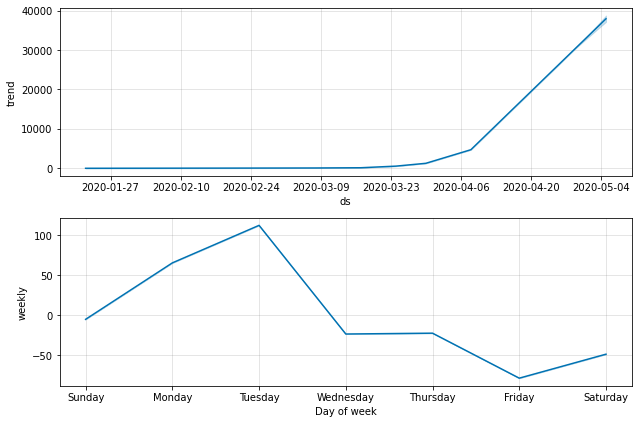

In [59]:
confirmed_plot_weekly_india = model.plot_components(forecast)